<h1><center>IE 313 Time Series Analysis: Code Implementation Assignment 1</center></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Data</a></span></li><li><span><a href="#Your-Data-Overview" data-toc-modified-id="Your-Data-Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Your Data Overview</a></span><ul class="toc-item"><li><span><a href="#Plot-Scatter" data-toc-modified-id="Plot-Scatter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot Scatter</a></span></li><li><span><a href="#Resample-Data" data-toc-modified-id="Resample-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Resample Data</a></span></li></ul></li><li><span><a href="#Define-Variables" data-toc-modified-id="Define-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define Variables</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting-Linear-Regression" data-toc-modified-id="Fitting-Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fitting Linear Regression</a></span></li><li><span><a href="#Plot-Linear-Regression-Results" data-toc-modified-id="Plot-Linear-Regression-Results-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plot Linear Regression Results</a></span></li><li><span><a href="#Linear-Regression-MSE" data-toc-modified-id="Linear-Regression-MSE-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Linear Regression MSE</a></span></li></ul></li><li><span><a href="#Residual-Analysis" data-toc-modified-id="Residual-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Residual Analysis</a></span><ul class="toc-item"><li><span><a href="#Residual-and-Standardized-Residual" data-toc-modified-id="Residual-and-Standardized-Residual-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Residual and Standardized Residual</a></span></li><li><span><a href="#Plot-Standardized-Residuals" data-toc-modified-id="Plot-Standardized-Residuals-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot Standardized Residuals</a></span></li><li><span><a href="#Histogram-of-Standardized-Residuals" data-toc-modified-id="Histogram-of-Standardized-Residuals-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Histogram of Standardized Residuals</a></span></li><li><span><a href="#Q-Q-Plot" data-toc-modified-id="Q-Q-Plot-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Q-Q Plot</a></span></li><li><span><a href="#Autocorrelation-function-(Correlogram)" data-toc-modified-id="Autocorrelation-function-(Correlogram)-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Autocorrelation function (Correlogram)</a></span></li></ul></li><li><span><a href="#Quadratic-Trends-Regression" data-toc-modified-id="Quadratic-Trends-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Quadratic Trends Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting-Quadratic-Trends-Regression" data-toc-modified-id="Fitting-Quadratic-Trends-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fitting Quadratic Trends Regression</a></span></li><li><span><a href="#Quadratic-Trends-Regression-MSE" data-toc-modified-id="Quadratic-Trends-Regression-MSE-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Quadratic Trends Regression MSE</a></span></li></ul></li><li><span><a href="#Other-Curve-Fitting" data-toc-modified-id="Other-Curve-Fitting-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other Curve Fitting</a></span><ul class="toc-item"><li><span><a href="#Fitting-Curve-Regression" data-toc-modified-id="Fitting-Curve-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fitting Curve Regression</a></span></li><li><span><a href="#Quadratic-Trends-Regression-MSE" data-toc-modified-id="Quadratic-Trends-Regression-MSE-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Quadratic Trends Regression MSE</a></span></li></ul></li></ul></div>

Install the required packages using pip
* Install using pip : `pandas`, `sklearn`, `matplotlib`, `statsmodels`
* This code was developed in Python 3.8 and any other versions are allowed.

In [ ]:
import numpy as np  #for numeric computations like log, exp, sqrt
import pandas as pd #for reading & storing data, pre=processing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt #for visualization
import statsmodels.api as sm
from scipy import stats

## Read Data

Download your data file in Excel (.csv) as shown in the figure above.

* You can use time-series data, which have 'Date' or 'Timestamp' columns.
* Also, you can use sequential data which do not have 'Date' columns.

Read '.csv' file in the form of DataFrame (pandas.DataFrame) through 'read_csv' method in Pandas. 

* Else, read using 'read_excel' method. 
* In this example, daily closing price of APPLE Inc. was used.
* If there is 'Date' column, indexing is possible by specifying 'index_col' as below.

In [ ]:
# use your own data
data = pd.read_csv('spx.csv', index_col='date')

In [ ]:
data.head()

,close
date,
02-Jan-86,209.59
03-Jan-86,210.88
06-Jan-86,210.65
07-Jan-86,213.80
08-Jan-86,207.97



It is convenient to change Date dtype from 'object' to 'datetime'.

In [ ]:
# check index type
data.index

Index(['02-Jan-86', '03-Jan-86', '06-Jan-86', '07-Jan-86', '08-Jan-86',
       '09-Jan-86', '10-Jan-86', '13-Jan-86', '14-Jan-86', '15-Jan-86',
       ...
       '18-Jun-18', '19-Jun-18', '20-Jun-18', '21-Jun-18', '22-Jun-18',
       '25-Jun-18', '26-Jun-18', '27-Jun-18', '28-Jun-18', '29-Jun-18'],
      dtype='object', name='date', length=8192)


Convert index type using 'pd.to_datetime' method.

In [ ]:
# convert index type to datetime
data.index = pd.to_datetime(data.index)

In [ ]:
# Check that dtype has changed to datetime
data.index

DatetimeIndex(['1986-01-02', '1986-01-03', '1986-01-06', '1986-01-07',
               '1986-01-08', '1986-01-09', '1986-01-10', '1986-01-13',
               '1986-01-14', '1986-01-15',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='date', length=8192, freq=None)

## Data Overview


Visualize data using 'plot()' function.

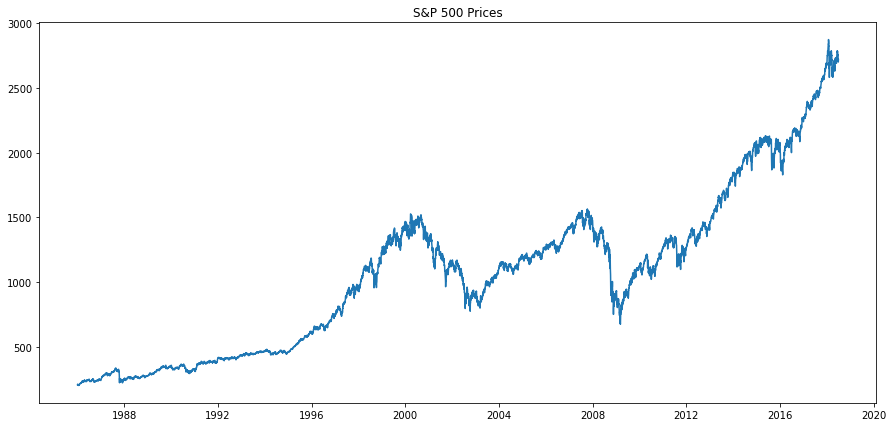

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(data)
plt.title('S&P 500 Prices')
plt.show();

### Plot Scatter

The figure below is a scatter plot in the textbook, and draw a graph to examine the relationship with the previous points.

![](https://trello.com/1/cards/62469d0f1dfc968cf7510f2b/attachments/63183fcc8ab03000373d8d61/previews/63183fcc8ab03000373d8d69/download/image.png)


Shift your data by one time step interval through 'shift(1)' and draw a scatter plot.

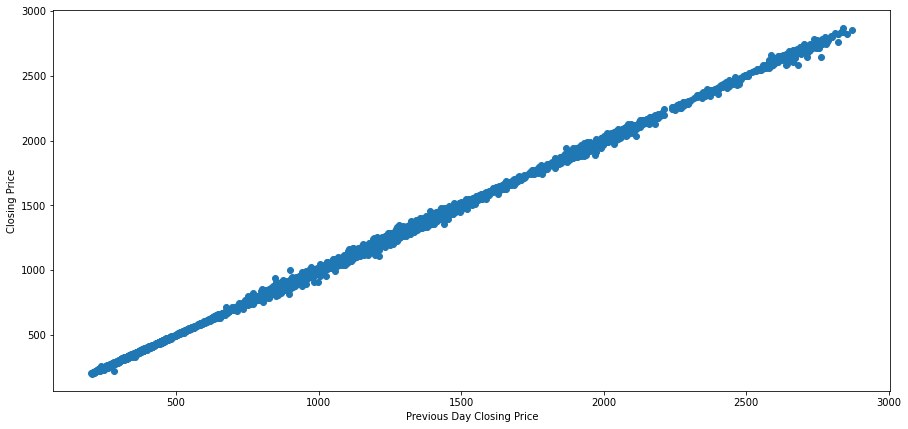

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(data.shift(1)[1:], data[1:])
plt.xlabel('Previous Day Closing Price')
plt.ylabel('Closing Price');

### Resample Data

Follow this part if you need to resample your data.

Set a different period using the `resample` (In this example,the period is changed from daily to monthly).

In [ ]:
# monthly_data = data.resample('M').first() # resample with closing price on the first trading day of the month 
# monthly_data = data.resample('M').mean() # resample with monthly average closing price
monthly_data = data.resample('M').last() # resample with closing price on the last trading day of the month 

In [ ]:
monthly_data.head()

,close
date,
1986-01-31,211.78
1986-02-28,226.92
1986-03-31,238.90
1986-04-30,235.52
1986-05-31,247.35


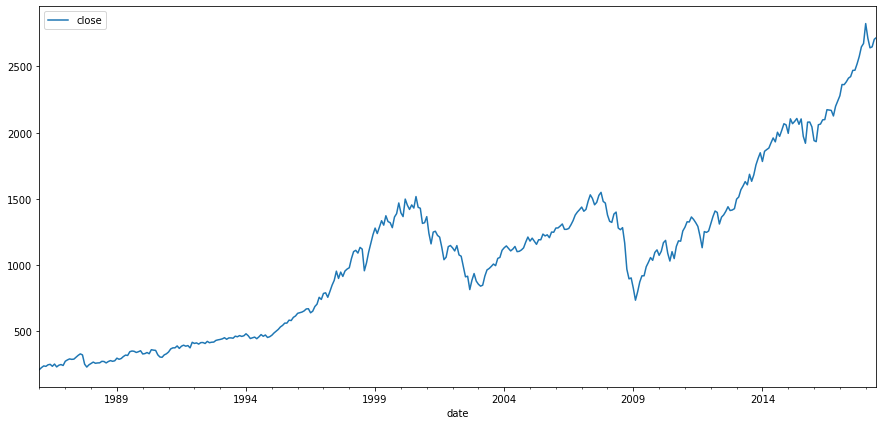

In [ ]:
# visualize resampled data
monthly_data.plot(figsize = (15,7));

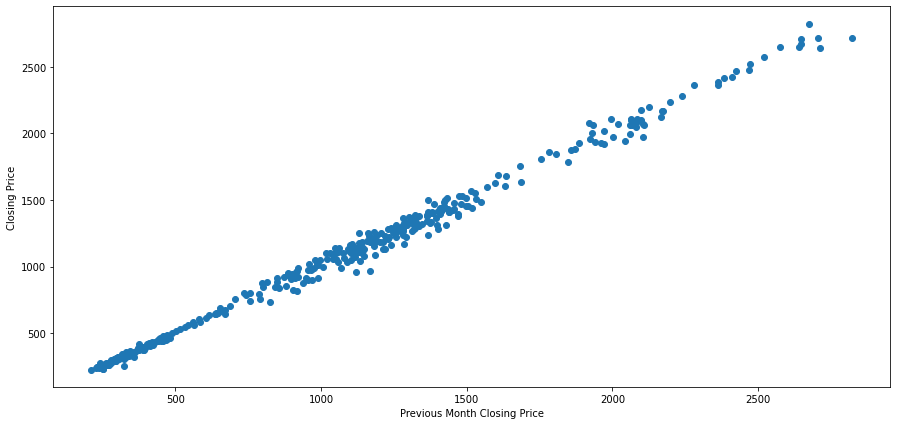

In [ ]:
# Relationship with the previous month
plt.figure(figsize = (15,7))
plt.scatter(monthly_data.shift(1)[1:], monthly_data[1:])
plt.xlabel('Previous Month Closing Price')
plt.ylabel('Closing Price');

## Define Variables

Set x so that can represent time as the length of data.


In [ ]:
x = np.arange(len(data))

Set y as the target of your analysis.

In [ ]:
# y = data.values.reshape(-1,1)
y = data.values

## Linear Regression

How to run the Linear Regression

$$y=w_0+w_1 x =\begin{bmatrix}
w_0 & w_1
\end{bmatrix}   \begin{bmatrix}
1\\
x
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




Find the parameter $\mathbf{w}$ based on linear regression model above.


Calculate vector $\mathbf{x}$.
Use `add_constant` method in statsmodels.

In [ ]:
X = sm.add_constant(x)
X

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 8.189e+03],
       [1.000e+00, 8.190e+03],
       [1.000e+00, 8.191e+03]])



Now, $y$ and $\mathbf{x}$ are ready. Find $\mathbf{w}$ to minimize the residual.



Use 'OLS.fit()' in statsmodels to fit linear model.
Use `summary()` method to analyze the result of model(p-value, R-squared, etc).



*   Fitting means to optimize $\mathbf{w}$.
*   Ordinary Least Square (OLS) can be utilized to minimize Mean Squared Error (MSE).



### Fitting Linear Regression

In [ ]:
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 4.058e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:38:17   Log-Likelihood:                -56944.
No. Observations:                8192   AIC:                         1.139e+05
Df Residuals:                    8190   BIC:                         1.139e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.7005      5.584     17.317      0.0



Calculate the parameter $\mathbf{w}$ using `params` method.

In [ ]:
lin_reg.params # w_0, w_1

array([96.70051163,  0.23787008])

In [ ]:
intercept=lin_reg.params[0]
coef = lin_reg.params[1]

In [ ]:
intercept

96.70051163060612

In [ ]:
coef

0.2378700767325277

Finally, $$y=96.701+0.2387 x$$ is obtained.

### Plot Linear Regression Results


Use the `predict` method to calculate the model prediction for input x

* Plot with your data

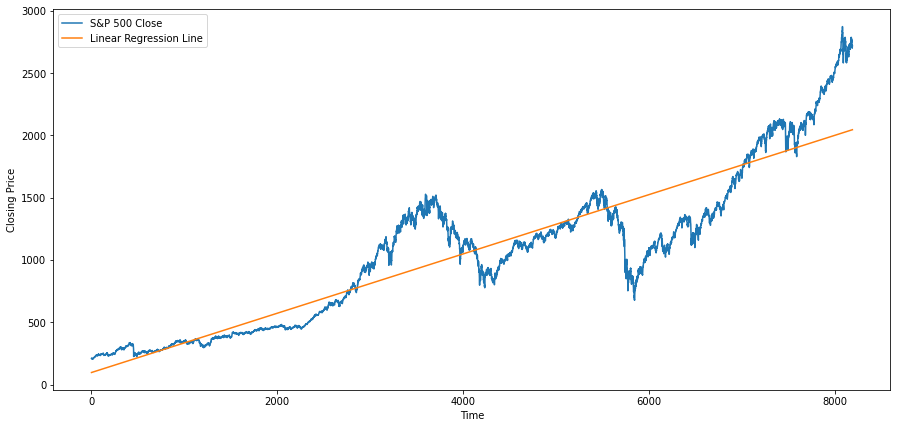

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(x,y,label='S&P 500 Close') # original data

y_hat = lin_reg.predict(X)
plt.plot(x,y_hat,label='Linear Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend();

### Linear Regression MSE


Calculate Mean Squared Error (MSE) of model using `mse_resid` method.

In [ ]:
# MSE
lin_reg.mse_resid

63875.53915390119

## Residual Analysis

Follow this part to practice with your data.

### Residual and Standardized Residual

$$\text{Residual}=y_t - \hat{y}_t$$

Calculate the residual using `lin_reg.resid` method.

In [ ]:
residual = lin_reg.resid

This residual is not standardized.

In [ ]:
residual

array([112.88948837, 113.94161829, 113.47374822, ..., 655.01143001,
       671.45355993, 673.27568985])


Use the below function to standardize residual.

In [ ]:
def standardized(array_like):
    mean = array_like.mean()
    std = array_like.std(ddof=1)
    return pd.Series((array_like - mean) / std)

`s_residual`: Standardized Residual

In [ ]:
s_residual = standardized(residual)

### Plot Standardized Residuals

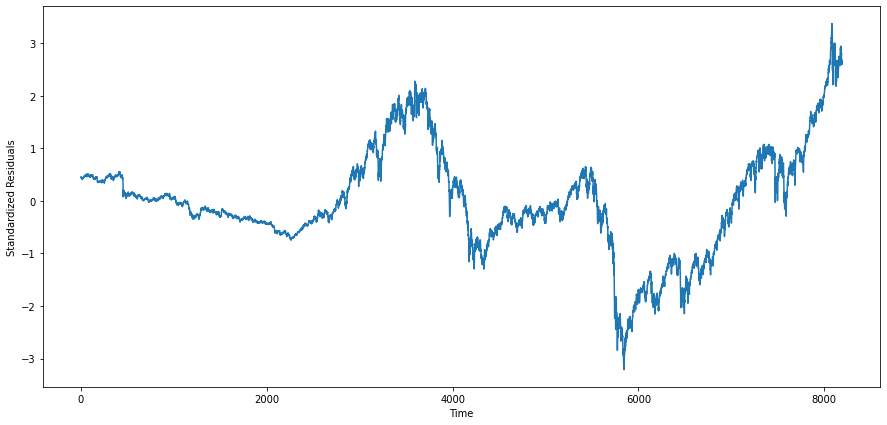

In [ ]:
s_residual.plot(figsize = (15,7));
plt.xlabel('Time')
plt.ylabel('Standardized Residuals');

You can realize the fact that standardized residual is not seen as white noise.

### Histogram of Standardized Residuals

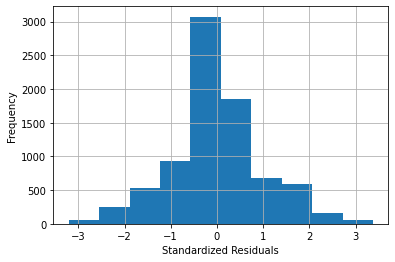

In [ ]:
s_residual.hist();
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency');

You can notice that the residual almost follow the normal distribution.

### Q-Q Plot

There is another method to visualize normality, Q-Q plot.

Plot with the scipy `probplot` function.

If you put the normal distribution in the dist as shown below, and if the dots are distributed along the red line, it means that the residual is close to the normal distribution.

In this example, it approximately follows the normal distribution.

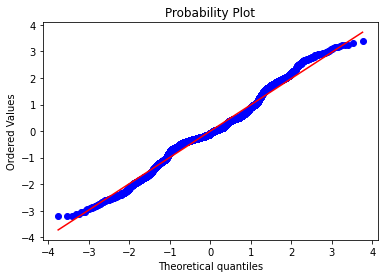

In [ ]:
stats.probplot(s_residual, dist=stats.norm, plot=plt);

### Autocorrelation function (Correlogram)


Plot the Correlogram(in Lecture note #3, p.36) using `plot_acf` in statsmodels.

Input the residual and put the number of lags you want check.

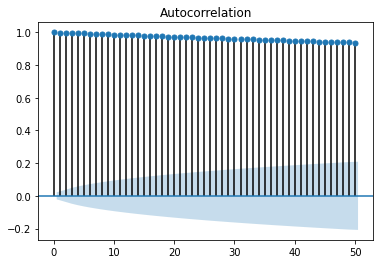

In [ ]:
sm.graphics.tsa.plot_acf(residual, lags=50);

In this example, all values are out of range of standard errors, so the residual is not seen as white noise.

## Quadratic Trends Regression


Running Quadratic Trends Regression is not quite different with the linear regression method.

$$y=w_0+w_1x+w_2 x^2  =\begin{bmatrix}
w_0 & w_1 & w_2
\end{bmatrix}   \begin{bmatrix}
1\\
x\\
x^2
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




Set $\mathbf{w}$, $\mathbf{x}$ as shown above, and get the optimal parameter using OLS.

*  The reason why it is linear here is that the degree of $w$ is 1, regardless of degree of $w$.



Generate $\mathbf{x}$ using `PolynomialFeatures` and `fit_transform` method.

* It assumes that there is a Quadratic Trends, so degree is 2.
* Because of the bias term ($w_0$), set include_bias=True.
* Reshape about input x in `fit_transform`.

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=True)

In [ ]:
X = poly_features.fit_transform(x.reshape(-1,1)) # need to reshape x here

In [ ]:
X.shape # (N, 3)

(8192, 3)

### Fitting Quadratic Trends Regression

In [ ]:
# Regression
quad_reg = sm.OLS(y, X).fit()
print(quad_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 2.200e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:38:18   Log-Likelihood:                -56666.
No. Observations:                8192   AIC:                         1.133e+05
Df Residuals:                    8189   BIC:                         1.134e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        241.3529      8.096     29.810      0.0

In [ ]:
quad_reg.params

array([2.41352869e+02, 1.31897654e-01, 1.29376661e-05])

In [ ]:
# get predicted value
y_hat = quad_reg.predict(X)

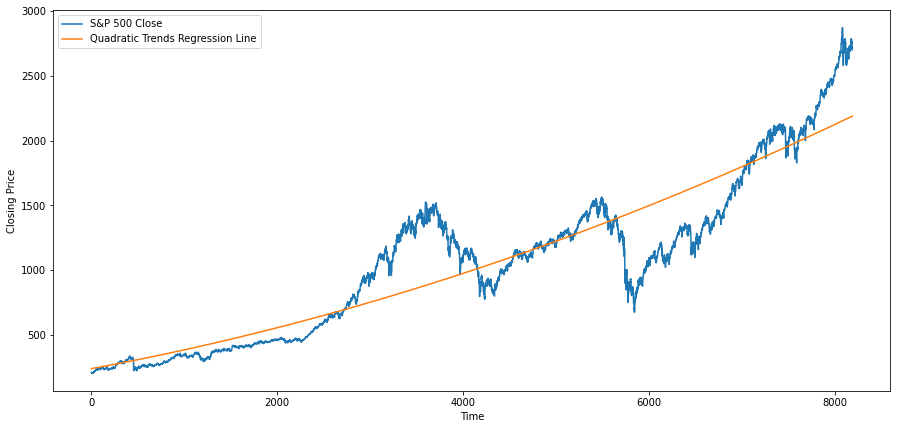

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(x,y,label='S&P 500 Close') # original data

y_hat = quad_reg.predict(X)
plt.plot(x,y_hat,label='Quadratic Trends Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend();

### Quadratic Trends Regression MSE

In [ ]:
lin_reg.mse_resid #Linear Regression MSE

63875.53915390119

In [ ]:
quad_reg.mse_resid

59693.87798977161

## Other Curve Fitting

You can freely fit regression by adding trigonometric functions or other trends to match your data as shown below.

$$y=w_0+w_1x+w_2 \text{sin}(2 \pi fx) + w_3 \text{cos}(2 \pi fx)$$


$$y=\begin{bmatrix}
w_0 & w_1 & w_2 & w_3 \end{bmatrix}\begin{bmatrix}
1\\
x\\
\text{sin}(2 \pi fx)\\
\text{cos}(2 \pi fx)
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




For example, in the case of model which contains linear, sine and cosine trends, set x as shown below.

* f, which is related to frequency in sine and cosine trends, should be set in advance. 
* In this example, f = $\frac{0.001}{2 \pi}$

* Find the f value that fits your data for regression.


Generate  $\mathbf{x}$ using `np.columns_stack` .

In [ ]:
f = 0.001 / (2*np.pi)
f

0.00015915494309189535

In [ ]:
X = np.column_stack((np.ones(len(x)), x,
                     np.sin(2* np.pi * f*x), np.cos(2* np.pi * f*x)))

In [ ]:
X.shape # (N, 4)

(8192, 4)

### Fitting Curve Regression

In [ ]:
curve_reg = sm.OLS(y, X).fit()
print(curve_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.852e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:40:53   Log-Likelihood:                -55847.
No. Observations:                8192   AIC:                         1.117e+05
Df Residuals:                    8188   BIC:                         1.117e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2389      5.042     10.758      0.0

In [ ]:
print("Parameters: ", curve_reg.params) # parameter w

Parameters:  [  54.2389222     0.25031567   71.4292681  -174.55228601]


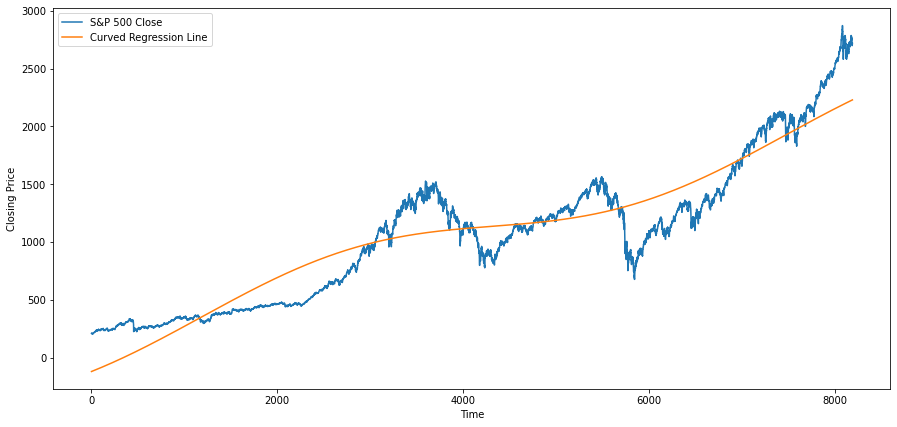

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(x,y,label='S&P 500 Close') # original data

y_hat = curve_reg.predict(X)
plt.plot(x,y_hat,label='Curved Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend();

### Quadratic Trends Regression MSE

In [ ]:
lin_reg.mse_resid #LInear Regression MSE

63875.53915390119

In [ ]:
quad_reg.mse_resid #Quadratic Trends Regression

59693.87798977161

In [ ]:
curve_reg.mse_resid

48875.205502082936